In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd

# Data Preparation Sprint Challenge

Data preparation can be an arduous process with many steps. These following challenges were all gone over in class.

There are six objectives in Data Preparation:

* select
* filter
* treat
* de-duplicate
* concatenate
* transform

There are three objectives in Data Visualization

* Draw an oblique topology
* Pairplot to find clusters
* Plot clusters together

Share with mlsubmissions@lambdaschool.com when finished.

# Select

Load `https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1` and remove any rows that are not data samples.

Print your result and its dimensions.

In [79]:
data = pd.read_csv("https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1",comment = '#')
print (data.columns)
print (data.shape)
print (data)

Index(['a', 'b', 'c', 'd', 'message'], dtype='object')
(3, 5)
   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


# Filter

Only access the rows or columns of a pandas `DataFrame` that you want.

Load `https://www.dropbox.com/s/xcqdya9svj04kwc/example5.csv?raw=1` for these examples.

In [199]:
data = pd.read_csv("https://www.dropbox.com/s/xcqdya9svj04kwc/example5.csv?raw=1", comment = "#")
print (data)
# Print only the third column
#print (data['c'])

# Print columns 'a' and 'message'
print (data[['a','message']])

# Print the first row
print(data[:1])
# Print the first and third rows
print (data.iloc[[0,2],:])

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo
   a message
0  1   hello
1  5   world
2  9     foo
   a  b  c  d message
0  1  2  3  4   hello
   a   b   c   d message
0  1   2   3   4   hello
2  9  10  11  12     foo


# Treat

Load `https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1` for these examples


In [91]:
# Print the sum of NaN values in each column
data3 = pd.read_csv("https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1", index_col='something')
print (data3)
print (data3.isnull().sum())
# Drop all ROWS that contain NaN and print the result
data4 = data3.dropna()
print (data4)
# Replace all cells containing NaN using ffill
print (data3.fillna(method = 'bfill'))

           a   b     c   d message
something                         
one        1   2   3.0   4     NaN
two        5   6   NaN   8   world
three      9  10  11.0  12     foo
a          0
b          0
c          1
d          0
message    1
dtype: int64
           a   b     c   d message
something                         
three      9  10  11.0  12     foo
           a   b     c   d message
something                         
one        1   2   3.0   4   world
two        5   6  11.0   8   world
three      9  10  11.0  12     foo


# De-Duplicate

Load `https://www.dropbox.com/s/5m89vi5qgu4g2cd/duped.csv?raw=1` for the following

In [66]:
# Print the contents of the dataframe after having dropped all duplicate rows
data_new = pd.read_csv("https://www.dropbox.com/s/5m89vi5qgu4g2cd/duped.csv?raw=1")
print (data_new) 
print (data_new.drop_duplicates())

   a   b   c
0  1   2   3
1  1   1   1
2  1   2   3
3  1   0   3
4  3   3   3
5  3   3   3
6  3   3   1
   a   b   c
0  1   2   3
1  1   1   1
3  1   0   3
4  3   3   3
6  3   3   1


# Concatenate

Merge the Titanic and OKC datasets by `age` using `pd.merge` and the `on` argument.

In [61]:
Titanic = pd.DataFrame({
    'age': [29, 24, 23, 38, 48, 44],
    'name': ['alpha', 'nu', 'gamma', 'psi', 'theta', 'rho']
})
OKC = pd.DataFrame({
    'age': [48, 44, 38, 29, 24, 23],
    'alive': [False, True, False, True, False, True]
})

# Merge and print the result
result = Titanic.merge(OKC, on = 'age')
print (result)

   age   name  alive
0   29  alpha   True
1   24     nu  False
2   23  gamma   True
3   38    psi  False
4   48  theta  False
5   44    rho   True


# Transform

Use `groupby` to separate the following dataframe by `speed`.

In [208]:
Rockets = pd.DataFrame({
   'speed': ['fast', 'fast', 'fast', 'slow', 'slow'],
   'engine': ['XX9', '24-Bravo', 'Lambda Nu', 'X1', 'XX8'],
   'name': ['Musky', 'NASO', 'COSMO', 'Zucc', 'Dragon egg']
})

# `groupby` and store the result.
df = Rockets.groupby('speed')
# Iterate over each result and print it on its own line/s
#print (df.describe())
for name1,group in df:
  print (name1)
  print (group)

fast
      engine   name speed
0        XX9  Musky  fast
1   24-Bravo   NASO  fast
2  Lambda Nu  COSMO  fast
slow
  engine        name speed
3     X1        Zucc  slow
4    XX8  Dragon egg  slow


# Draw an oblique topology

The Mexican Hat Filter or Laplacian of Gaussian is used for cleaning up noisy 2d data, such as in images. It makes a pretty cool 3d graph.

Plot the filter that is returned by the defined function. The range of the function as defined should be interesting from approximately -1 to 1

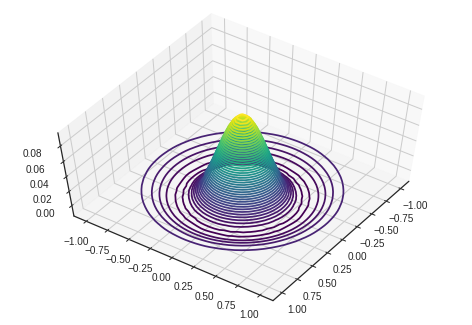

In [206]:
def laplacian_of_gaussian(x,y):
    sigma = 0.3
    return 1/np.pi*sigma * (1-0.5*((x**2 + y**2)/sigma**2)) * np.exp(-((x**2+y**2)/(2*sigma**2)))

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

x = np.linspace(-1, 1, 40)
y = np.linspace(-1, 1, 40)

X, Y = np.meshgrid(x, y)
Z = laplacian_of_gaussian(X, Y)
ax.contour3D(X, Y, Z,50, cmap='viridis')
ax.view_init(60, 35)


# Pairplot to find clusters

Clusters have a normal shape along each axis. Pairplot the following data and manually print which axes are normal.

Read your data from `https://www.dropbox.com/s/ziqwkm163ih96v0/sprint_challenge_data.csv?raw=1`

Index(['Unnamed: 0', 'na', 'nb', 'lx', 'ly', 'r', 'ny', 'nx'], dtype='object')


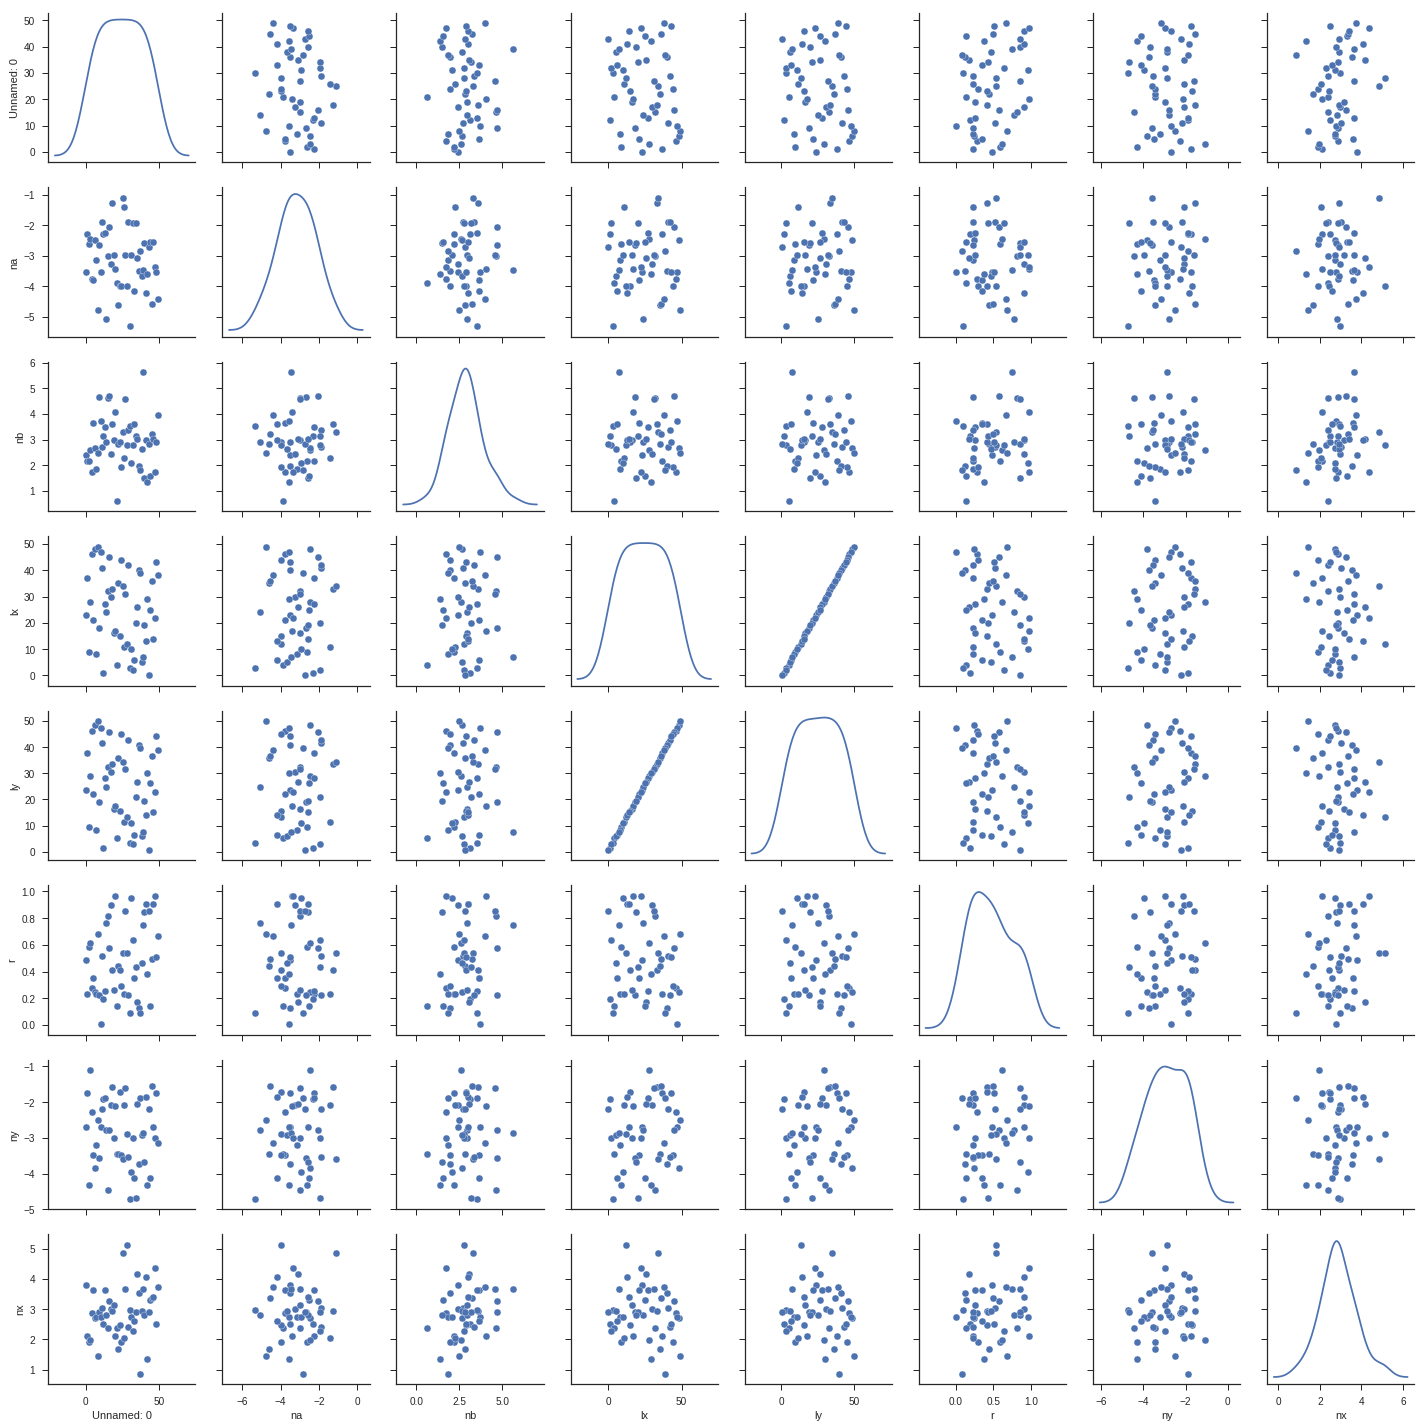

In [205]:
import seaborn as sns

# Pairplot via seaborn
data = pd.read_csv("https://www.dropbox.com/s/ziqwkm163ih96v0/sprint_challenge_data.csv?raw=1")
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, diag_kind="kde")
print (data.columns)

# Plot clusters together

You found the clusters. Draw them on the same graph.

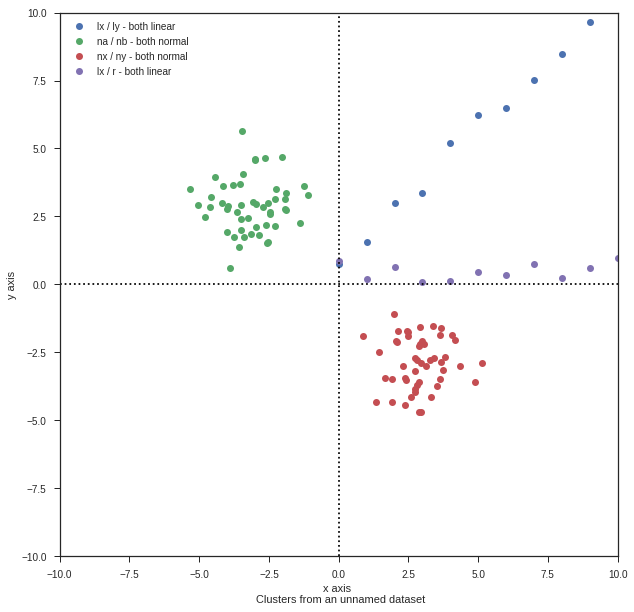

In [207]:
# Plot clusters of normal shapes for 'ly','r','lx','ny','nb','na'
# Plot clusters

plt.figure(figsize=(10,10))

plt.plot(data['lx'],data['ly'],'o',label='lx / ly - both linear')
plt.plot(data['na'],data['nb'],'o',label='na / nb - both normal')
plt.plot(data['nx'],data['ny'],'o',label='nx / ny - both normal')
plt.plot(data['lx'],data['r'],'o',label='lx / r - both linear')
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.xlabel("x axis \n Clusters from an unnamed dataset")
plt.ylabel('y axis')
plt.axhline(ls=':',c='black')
plt.axvline(ls=':',c='black')
plt.legend()
plt.show()